<a href="https://colab.research.google.com/github/Sareh89Ahd/Sareh.Ahmadinasab/blob/main/Sareh_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install imbalanced-learn==0.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [3]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from pycaret.utils import version
version()

'3.0.0'

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [7]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Sareh89Ahd/Sareh.Ahmadinasab/main/Birds-Info.csv')
df.head(5)

,huml,humw,ulnal,ulnaw,feml,femw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,SW


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   type    413 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.7+ KB


In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())


Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())


Number of rows with NaNs is:  0


**Exploratory Data Analysis**

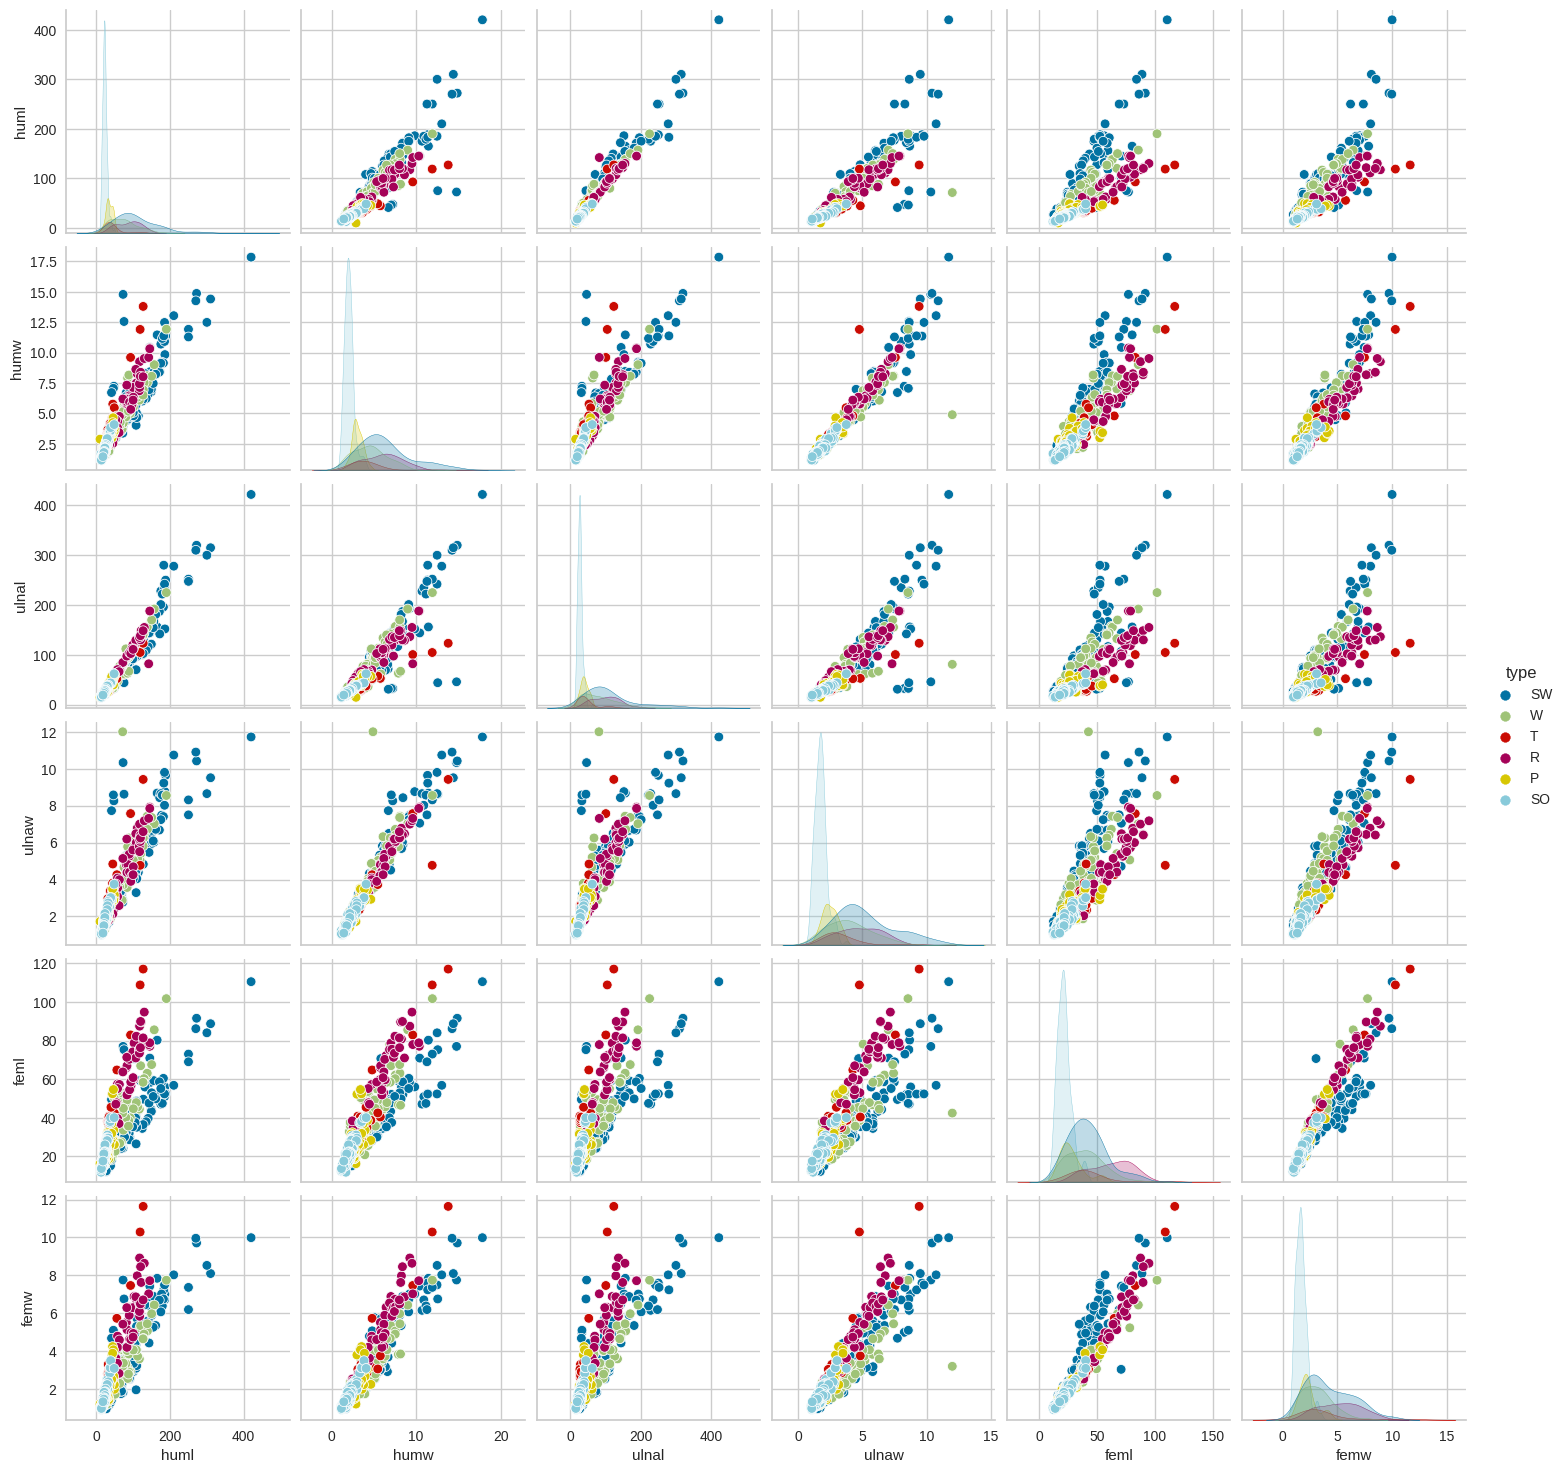

In [122]:

sns.pairplot(df, hue='type')
plt.show()

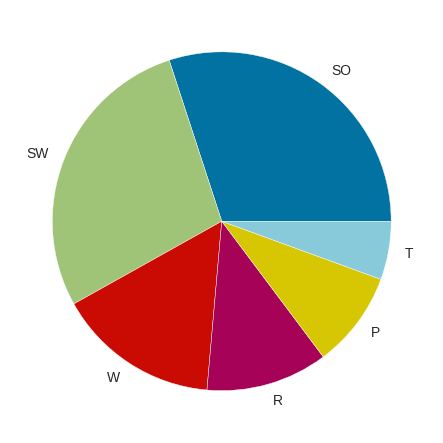

In [123]:
y =df['type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [11]:
df.describe()

,huml,humw,ulnal,ulnaw,feml,femw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000


**Check the number of specimens in each ecological group.**

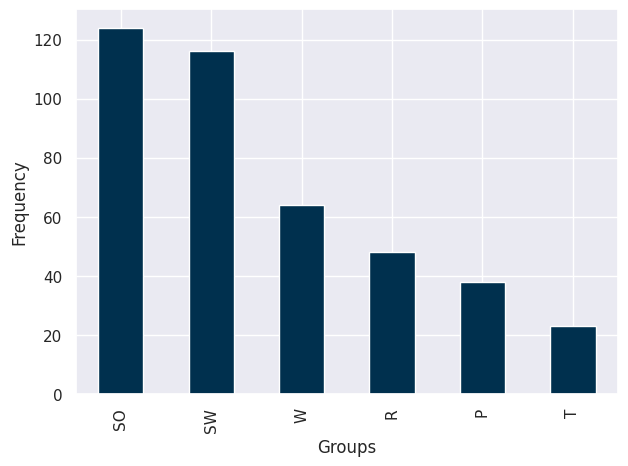

In [12]:
y =df['type']
y.value_counts().plot(kind='bar', color='#00304e')
plt.ylabel('Frequency')
plt.xlabel("Groups")
plt.show()


In [13]:
X = df.drop(columns=['type'])
X.head(10)

,huml,humw,ulnal,ulnaw,feml,femw
0,80.78,6.68,72.01,4.88,41.81,3.70
1,88.91,6.63,80.53,5.59,47.04,4.30
2,79.97,6.37,69.26,5.28,43.07,3.90
3,77.65,5.70,65.76,4.77,40.04,3.52
4,62.80,4.84,52.09,3.73,33.95,2.72
5,61.92,4.78,50.46,3.47,49.52,4.41
6,79.73,5.94,67.39,4.50,42.07,3.41
7,86.98,5.68,74.52,4.55,44.46,3.78
8,118.20,7.82,116.64,6.13,59.33,5.45
9,145.00,10.42,144.00,7.05,70.96,7.44


In [14]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
huml,413.0,64.874867,54.056078,9.85,25.36,44.18,90.49,420.00
humw,413.0,4.381235,2.861460,1.14,2.20,3.50,5.82,17.84
ulnal,413.0,69.197409,58.929490,14.09,28.16,43.71,97.52,422.00
ulnaw,413.0,3.606538,2.190150,1.00,1.87,2.96,4.77,12.00
feml,413.0,36.822446,19.899356,11.83,21.35,31.09,47.09,117.07
femw,413.0,3.221768,2.021169,0.93,1.72,2.52,4.11,11.64


**Data Standardization**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,huml,humw,ulnal,ulnaw,feml,femw
0,0.294591,0.804328,0.047786,0.582155,0.250943,0.236899
1,0.445173,0.786834,0.192541,0.906727,0.514084,0.534117
2,0.279588,0.695861,0.001063,0.765012,0.314338,0.335971
3,0.236618,0.461430,-0.058402,0.531869,0.161887,0.147733
4,-0.038430,0.160520,-0.290655,0.056440,-0.144524,-0.248557
5,-0.054729,0.139526,-0.318349,-0.062417,0.638863,0.588607
6,0.275143,0.545405,-0.030708,0.408441,0.264025,0.093243
7,0.409426,0.454432,0.090431,0.431298,0.384275,0.276528
8,0.987674,1.203210,0.806050,1.153584,1.132441,1.103784
9,1.484057,2.112939,1.270897,1.574156,1.717591,2.089557


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,413.0,-2.064531e-16,1.001213,-1.019157,-0.731884,-0.383305,0.474437,6.577537
humw,413.0,2.064531e-16,1.001213,-1.134095,-0.763205,-0.308340,0.503418,4.709166
ulnal,413.0,-2.064531e-16,1.001213,-0.936276,-0.697226,-0.433031,0.481201,5.994121
ulnaw,413.0,6.881770e-17,1.001213,-1.191562,-0.793847,-0.295560,0.531869,3.837016
feml,413.0,6.881770e-17,1.001213,-1.257466,-0.778478,-0.288421,0.516600,4.037562
femw,413.0,1.032265e-16,1.001213,-1.135257,-0.743920,-0.347630,0.439998,4.170082


**Observations and variables**

In [17]:
observations = list(df.index)
variables = list(df.columns)

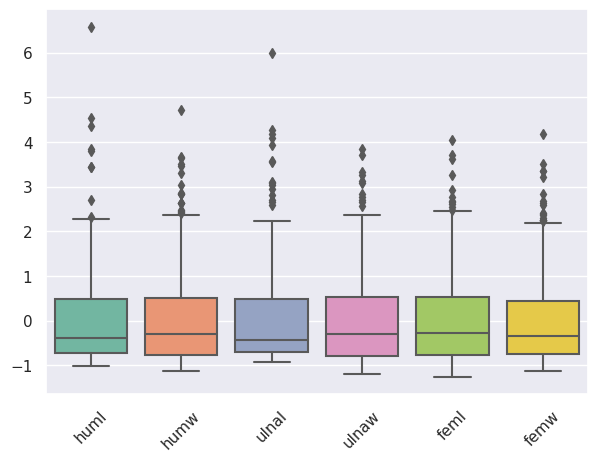

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

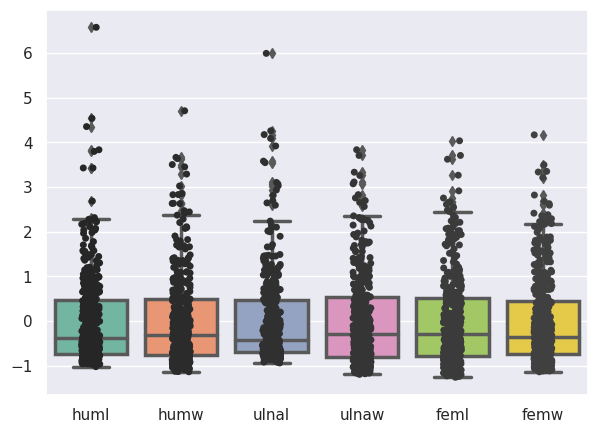

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

**Correlation Matrix**

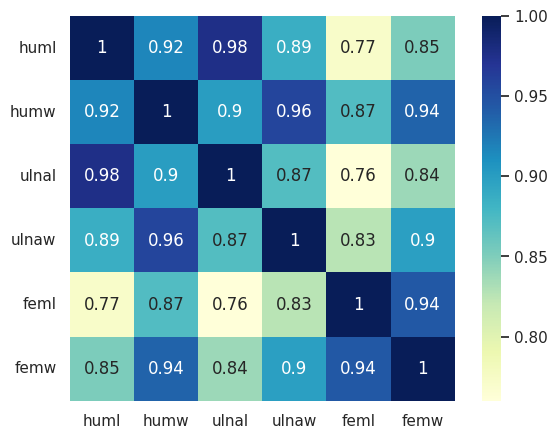

In [20]:
x = sns.heatmap(X.corr(), vmax=1, square=True,annot=True,cmap='YlGnBu')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);  

In [21]:
eigen_values, eigen_vectors = np.linalg.eig(X.corr())
print(eigen_vectors)
print(eigen_values)

[[ 0.40836626  0.46005248 -0.26798864 -0.73414513  0.10165527 -0.02163181]
 [ 0.42194129 -0.00821     0.32808876  0.20845518  0.77119918  0.2757792 ]
 [ 0.40397641  0.49812    -0.35647068  0.64134647 -0.20464578 -0.0916678 ]
 [ 0.41113675  0.03791395  0.73307053 -0.05786172 -0.38769279 -0.37213307]
 [ 0.3903953  -0.63085274 -0.38536093 -0.00317118  0.13470908 -0.53193673]
 [ 0.41299357 -0.37516413 -0.08702331 -0.05379624 -0.42963461  0.70259177]]
[5.4055206  0.35924937 0.1400567  0.02250079 0.03089697 0.04177556]


<Figure size 700x500 with 0 Axes>

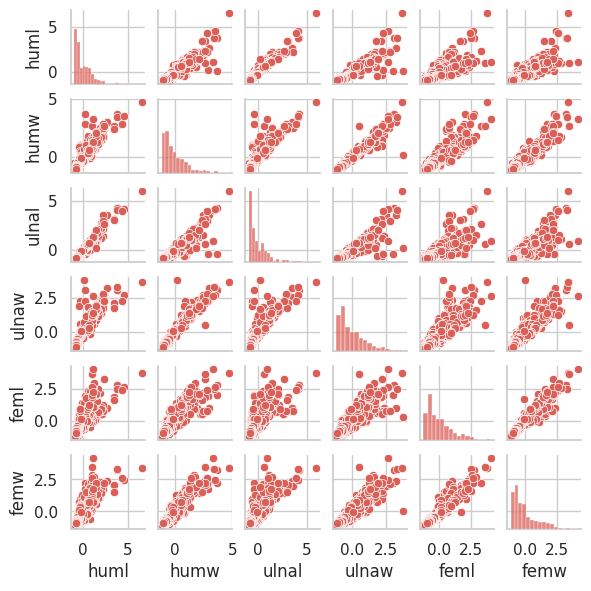

In [22]:
plt.figure()
sns.set(context='notebook',style='whitegrid',palette='hls',font='sans-serif', font_scale=1)
pairplot= sns.pairplot(data=X,height=1)  

**Principal Component Analysis (PCA)**

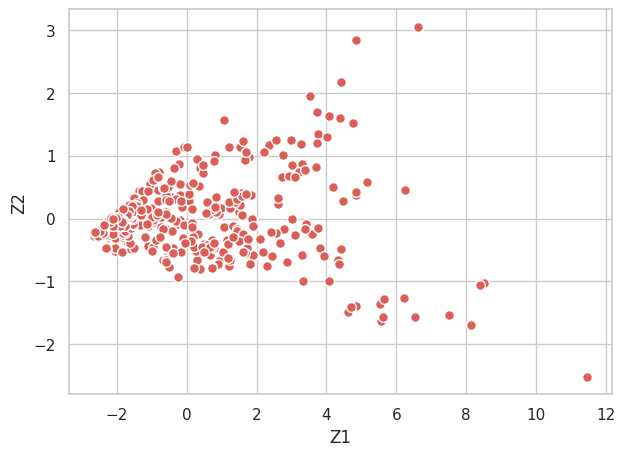

In [23]:
pca = PCA()
Z = pca.fit_transform(X)
plt. figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.scatter(Z[:,0], Z[:,1], s=50,edgecolors='white')

**Eigenvectors**

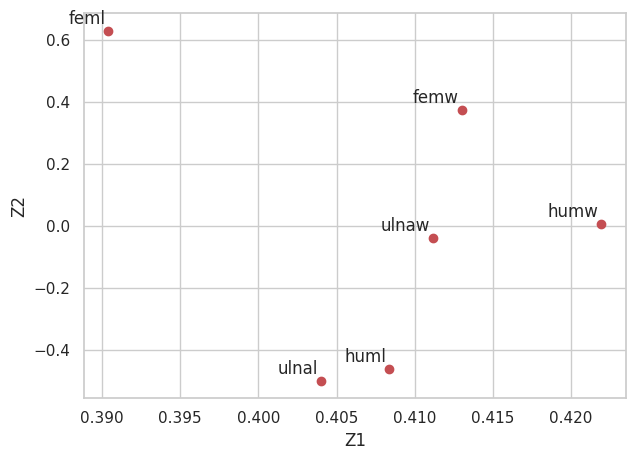

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

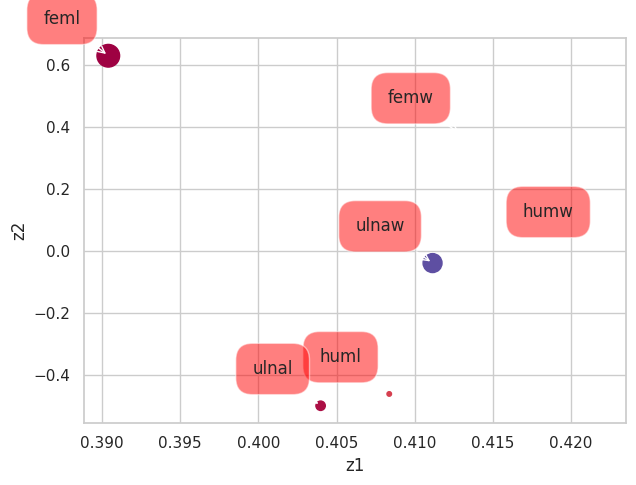

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('z1')
plt.ylabel('z2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=1', fc='red', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

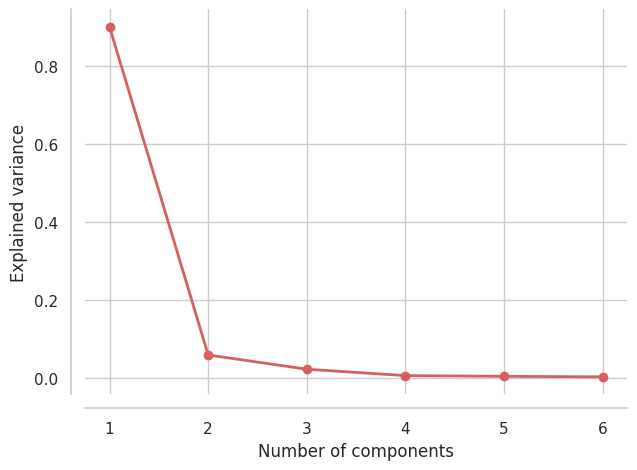

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
sns.set(context='notebook',style='ticks', palette='muted',font='sans-serif', font_scale=1)
sns.despine(offset=10)

**Pareto Chart**

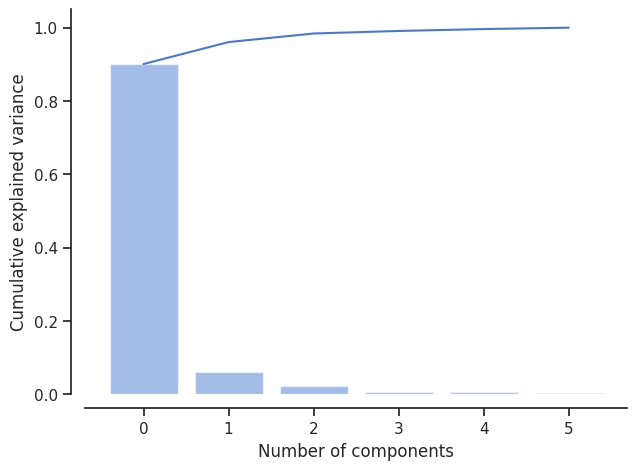

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
sns.set(palette='muted',font='sans-serif', font_scale=1)
sns.despine(offset=10)  

**Biplot**

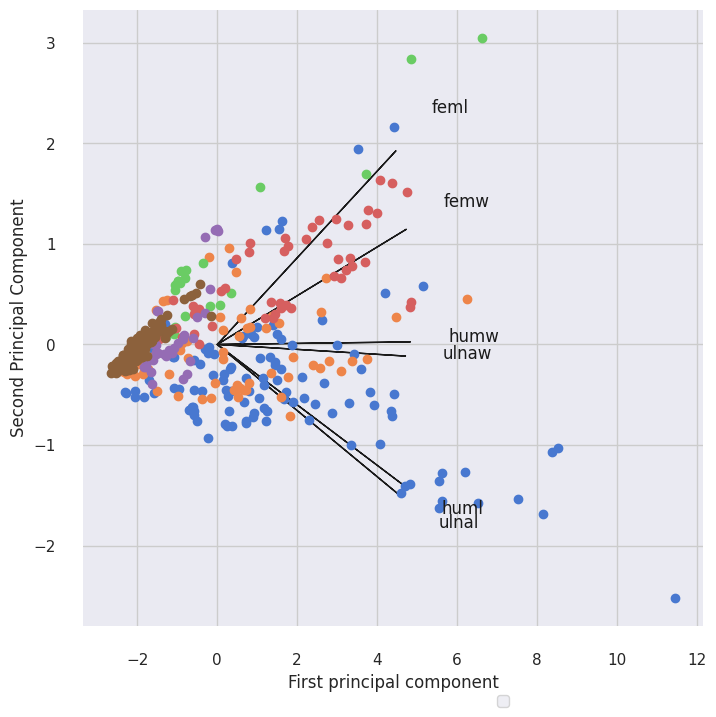

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]
fig, ax = plt.subplots(figsize=(8,8))

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
for i in df['type'].unique():
    ax.scatter(Z1[df['type']==i], Z2[df['type']==i])
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.7, -0.1),loc='upper right')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
sns.set(context='notebook',style='ticks', palette='Set3',font='sans-serif', font_scale=1)
sns.despine(offset=10)
plt.show()

Text(0.5, 1.0, 'PCA Covariance Matrix')

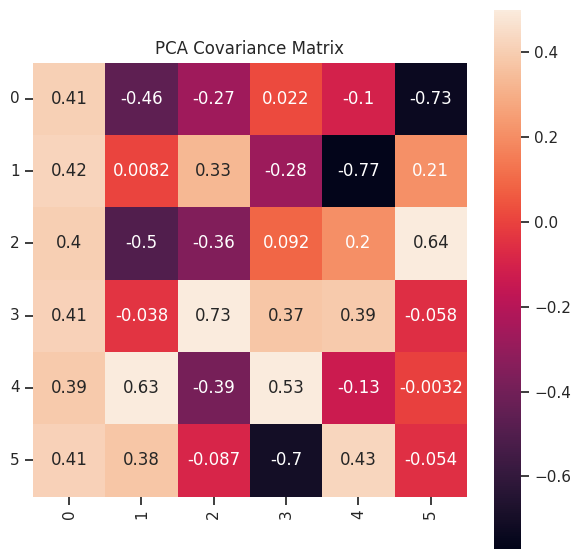

In [36]:
comps = pd.DataFrame(A)
plt.figure(figsize=(7,7))
ax=sns.heatmap(comps,vmax=0.5, square=True,annot=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=True,labeltop=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('PCA Covariance Matrix')

**Applying PCA**

In [38]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [40]:
out['PC']

,PC1,PC2
0,0.914135,0.072385
1,1.385645,0.196064
2,0.984211,0.171899
3,0.610614,0.061409
4,-0.201251,-0.022784
...,...,...
408,-2.238420,-0.044531
409,-2.188181,-0.059500
410,-2.162006,0.002105
411,-2.097052,-0.011672


**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [98.41%] of the variance'}, xlabel='PC1 (90.0% expl.var)', ylabel='PC2 (5.98% expl.var)'>)

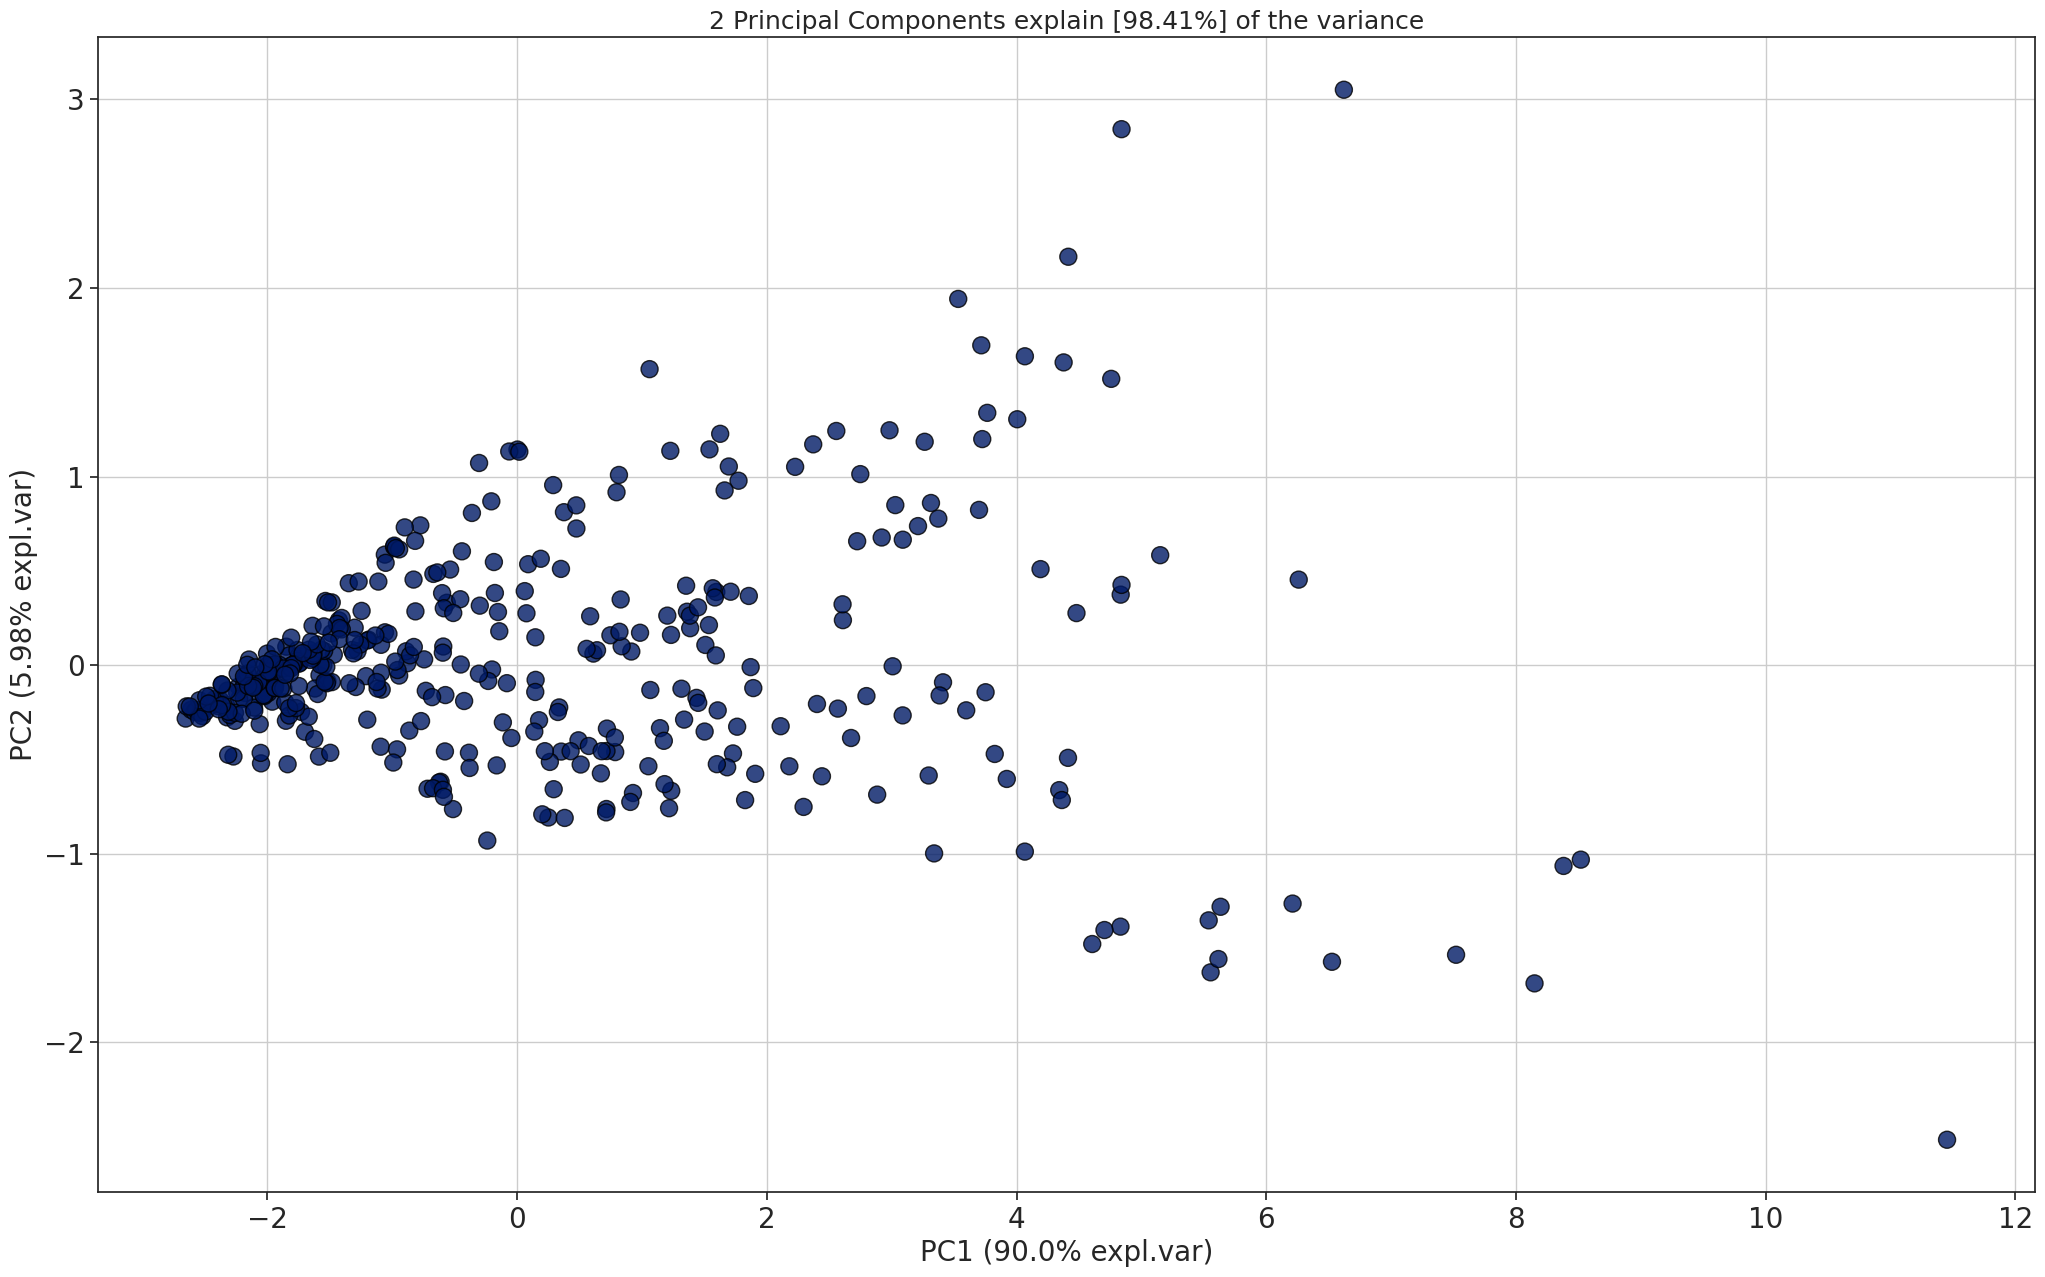

In [41]:
model.scatter(label=True,legend=False)

**Eigenvectors**

In [42]:
A = out['loadings'].T

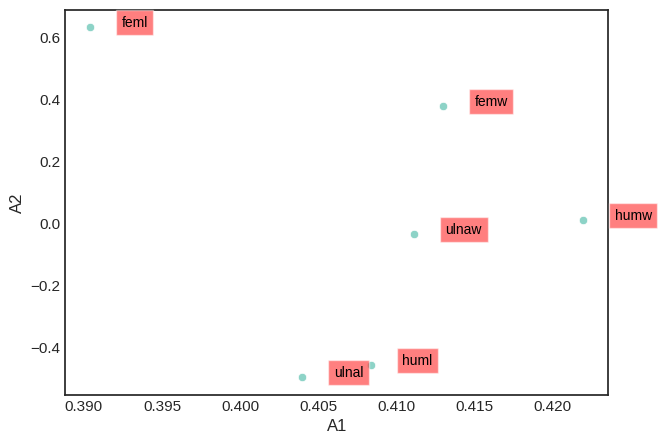

In [46]:
plt. figure()
plt.style.use('seaborn-white') 
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
          plt.text(x=A.PC1[i]+0.002,y=A.PC2[i]+0.002, s=variables[i],
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='red',alpha=0.5))

**Screen Plot**

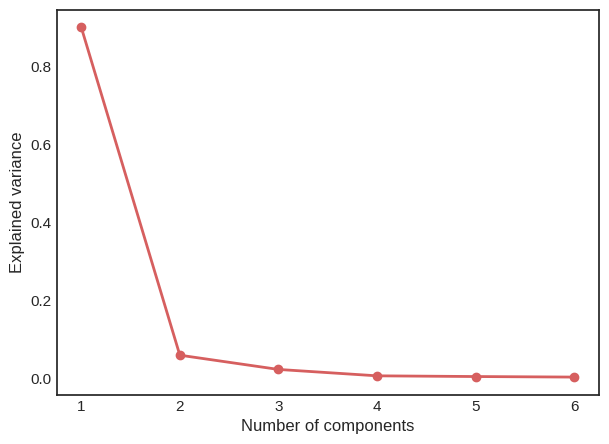

In [47]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

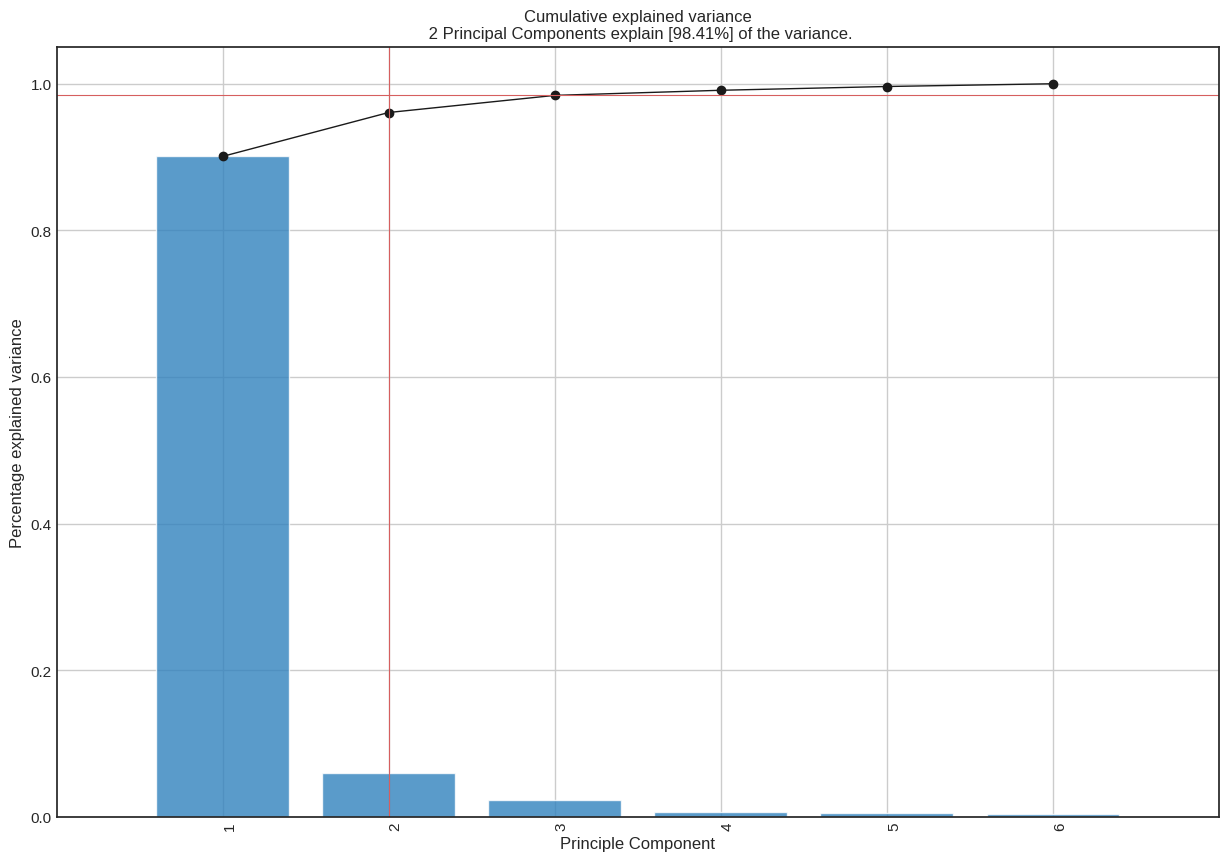

<Figure size 700x500 with 0 Axes>

In [48]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


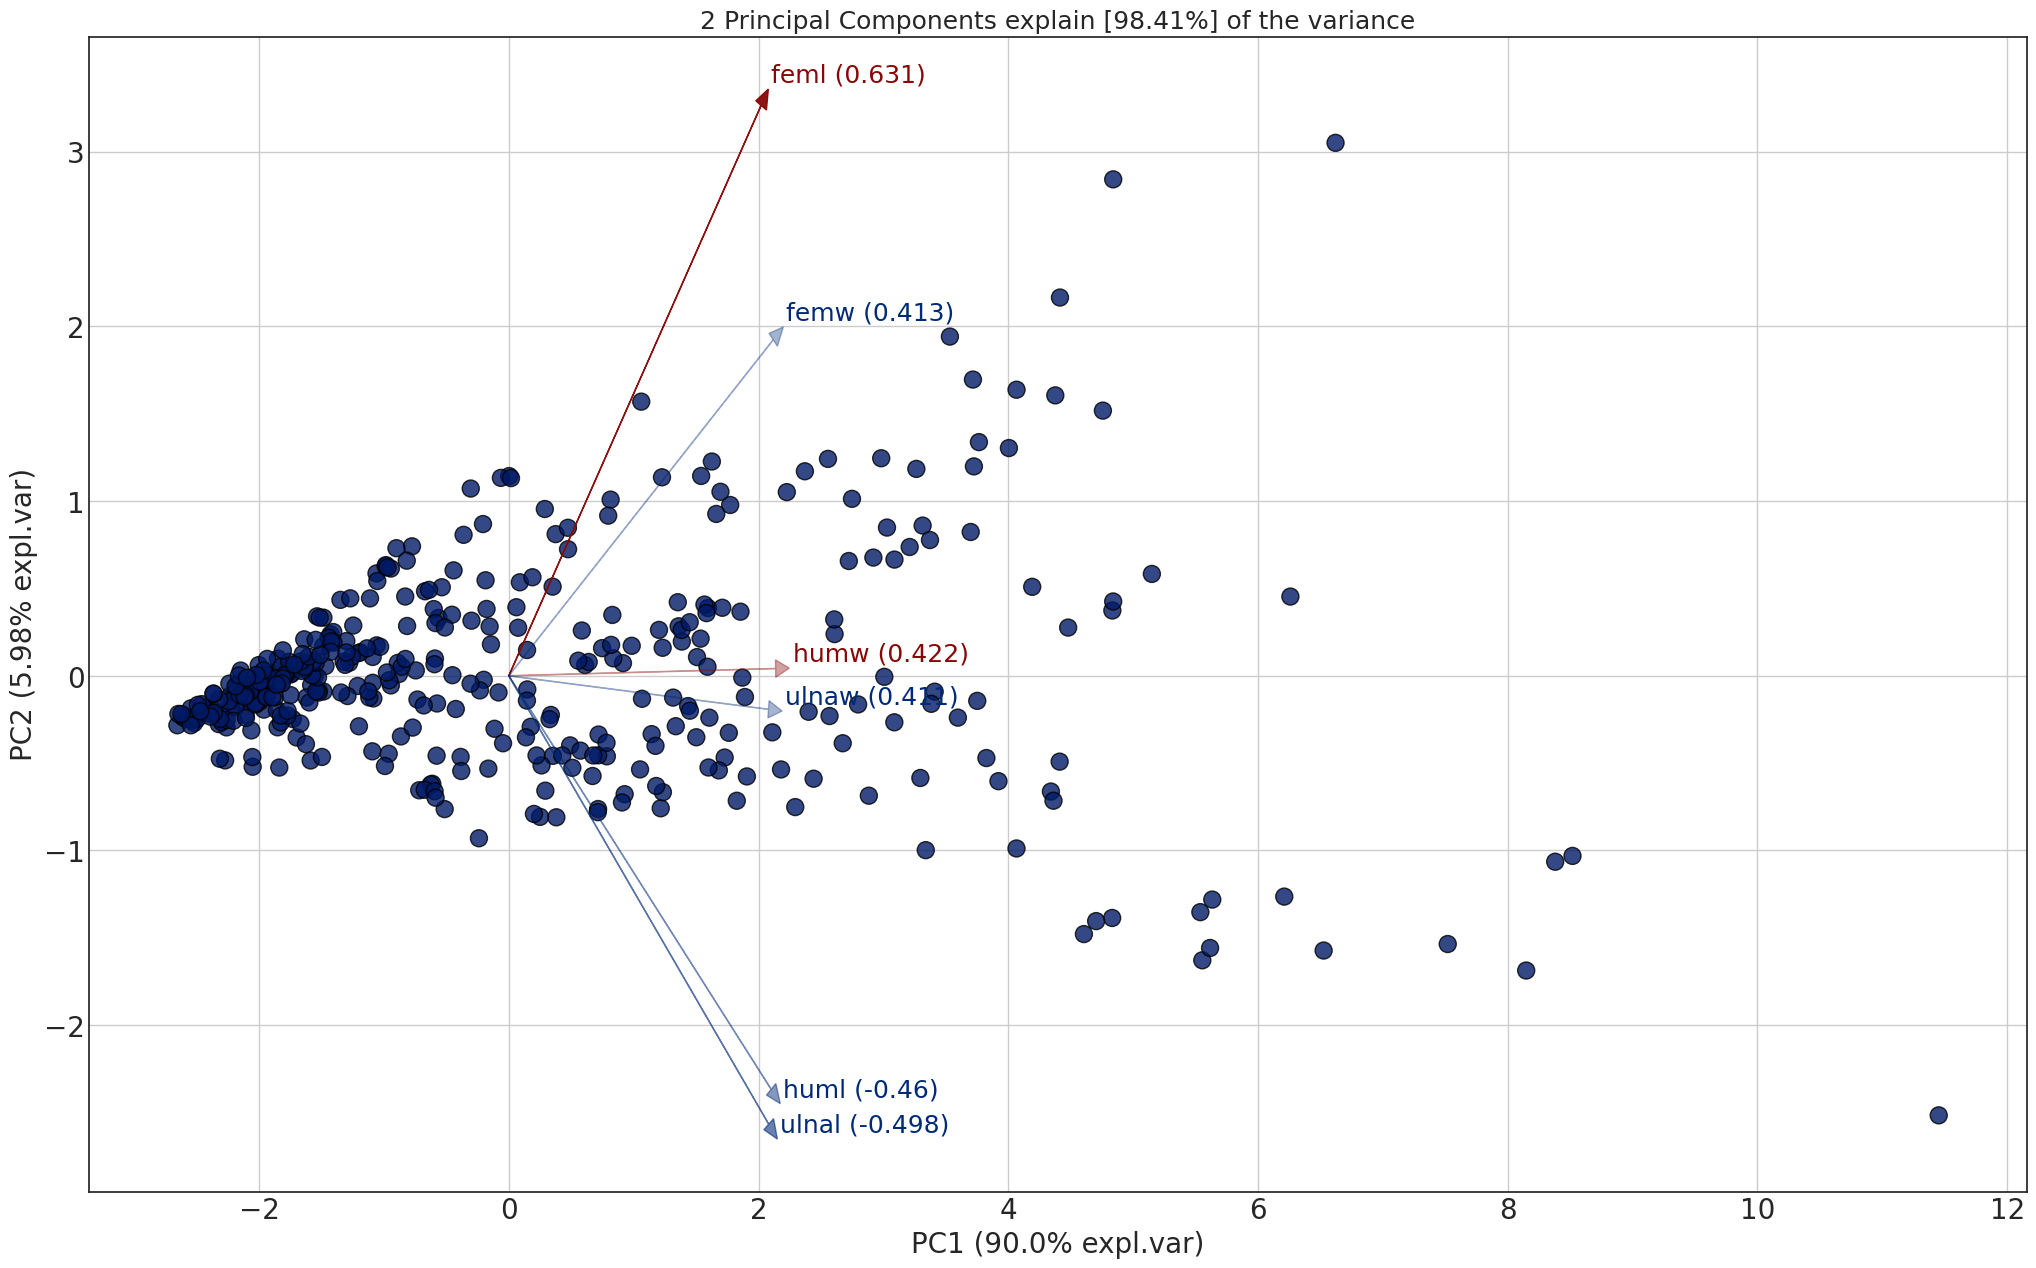

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [98.41%] of the variance'}, xlabel='PC1 (90.0% expl.var)', ylabel='PC2 (5.98% expl.var)'>)

In [52]:
model.biplot(label=False, legend=False)

In [53]:
model.biplot3d(legend=False)


ValueError: ignored

**Classification**

In [66]:

#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

ImportError: ignored

In [67]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (372, 7)
Unseen Data For Predictions: (41, 7)


In [69]:
from pycaret.classification import *

In [72]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=1368, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,Session id,1368
1,Target,type
2,Target type,Multiclass
3,Target mapping,"P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5"
4,Original data shape,"(372, 7)"
5,Transformed data shape,"(372, 3)"
6,Transformed train set shape,"(260, 3)"
7,Transformed test set shape,"(112, 3)"
8,Numeric features,6
9,Preprocess,True


In [59]:
#show the best model and their statistics
best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7885,0.9476,0.7885,0.7983,0.7788,0.7275,0.7332,0.8170
et,Extra Trees Classifier,0.7885,0.9460,0.7885,0.7911,0.7683,0.7247,0.7337,0.7700
qda,Quadratic Discriminant Analysis,0.7808,0.9477,0.7808,0.8042,0.7717,0.7207,0.7293,0.0720
rf,Random Forest Classifier,0.7500,0.9334,0.7500,0.7721,0.7337,0.6779,0.6874,0.5230
xgboost,Extreme Gradient Boosting,0.7385,0.9239,0.7385,0.7424,0.7232,0.6634,0.6717,0.3540
knn,K Neighbors Classifier,0.7346,0.9043,0.7346,0.7536,0.7154,0.6569,0.6663,0.0710
gbc,Gradient Boosting Classifier,0.7269,0.9133,0.7269,0.7118,0.7052,0.6454,0.6523,1.6000
lightgbm,Light Gradient Boosting Machine,0.7269,0.9280,0.7269,0.7245,0.7100,0.6467,0.6546,0.3910
dt,Decision Tree Classifier,0.7192,0.8250,0.7192,0.7431,0.7095,0.6409,0.6491,0.0850
ridge,Ridge Classifier,0.6577,0.0000,0.6577,0.5765,0.5795,0.5348,0.5754,0.1020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [73]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4615,0.6730,0.4615,0.4652,0.4487,0.3158,0.3225
1,0.6154,0.7630,0.6154,0.6154,0.6026,0.5066,0.5136
2,0.6923,0.8104,0.6923,0.6500,0.6627,0.6023,0.6106
3,0.5385,0.6942,0.5385,0.4050,0.4622,0.3834,0.3954
4,0.7308,0.8352,0.7308,0.7748,0.7275,0.6546,0.6610
5,0.4615,0.6737,0.4615,0.5096,0.4800,0.3158,0.3176
6,0.5769,0.7352,0.5769,0.5801,0.5725,0.4604,0.4630
7,0.7692,0.8492,0.7692,0.6575,0.6977,0.6971,0.7163
8,0.7308,0.8440,0.7308,0.7564,0.7410,0.6604,0.6617


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=1368, splitter='best')

In [76]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5769,0.7983,0.5769,0.4709,0.5140,0.4392,0.4590
1,0.5385,0.8584,0.5385,0.4769,0.5032,0.3953,0.4020
2,0.6923,0.8513,0.6923,0.5983,0.6256,0.5889,0.6141
3,0.5769,0.8249,0.5769,0.5929,0.5708,0.4521,0.4566
4,0.6538,0.8273,0.6538,0.5442,0.5933,0.5456,0.5547
5,0.5385,0.8442,0.5385,0.5310,0.5251,0.3977,0.4033
6,0.5769,0.8621,0.5769,0.5878,0.5473,0.4694,0.4837
7,0.7308,0.8600,0.7308,0.5809,0.6331,0.6396,0.6704
8,0.8077,0.8789,0.8077,0.8478,0.8044,0.7584,0.7669


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.02, min_samples_leaf=4,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       random_state=1368, splitter='best')

**Evaluate Decision Tree Model**

In [83]:
#Update statmodels
!pip3 install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

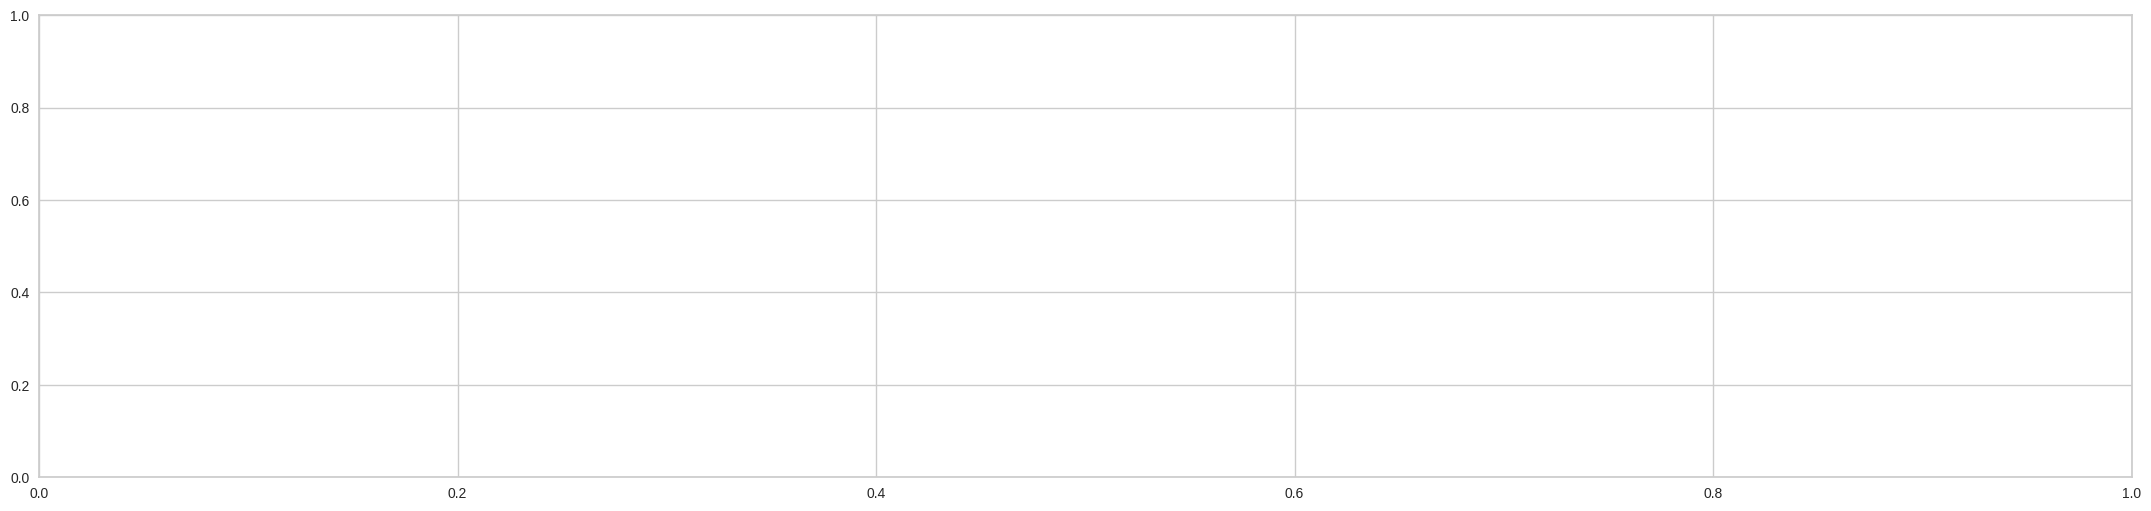

In [84]:
evaluate_model(tuned_dt)

**Create K Neighbors Model**

In [80]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.8321,0.5385,0.5641,0.5436,0.4068,0.4147
1,0.6154,0.7741,0.6154,0.5692,0.5791,0.5000,0.5071
2,0.6923,0.8428,0.6923,0.6677,0.6742,0.6000,0.6024
3,0.6154,0.8706,0.6154,0.5327,0.5701,0.4971,0.5042
4,0.6538,0.8708,0.6538,0.6051,0.6235,0.5534,0.5589
5,0.5000,0.8620,0.5000,0.4445,0.4618,0.3574,0.3741
6,0.5385,0.8255,0.5385,0.4865,0.4986,0.4190,0.4327
7,0.7308,0.9280,0.7308,0.6190,0.6593,0.6452,0.6590
8,0.6923,0.9335,0.6923,0.8125,0.6896,0.6197,0.6384


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [81]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5769,0.8416,0.5769,0.5641,0.5692,0.4563,0.4624
1,0.6154,0.7660,0.6154,0.5497,0.5665,0.4961,0.5086
2,0.6923,0.8812,0.6923,0.5500,0.6106,0.5914,0.6081
3,0.5769,0.8458,0.5769,0.5183,0.5419,0.4457,0.4503
4,0.5769,0.8679,0.5769,0.4802,0.5164,0.4521,0.4621
5,0.5000,0.8455,0.5000,0.6195,0.5016,0.3562,0.3675
6,0.6154,0.8896,0.6154,0.5342,0.5707,0.5000,0.5110
7,0.7692,0.8969,0.7692,0.6863,0.7142,0.6965,0.7098
8,0.7308,0.9182,0.7308,0.6325,0.6715,0.6553,0.6708


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

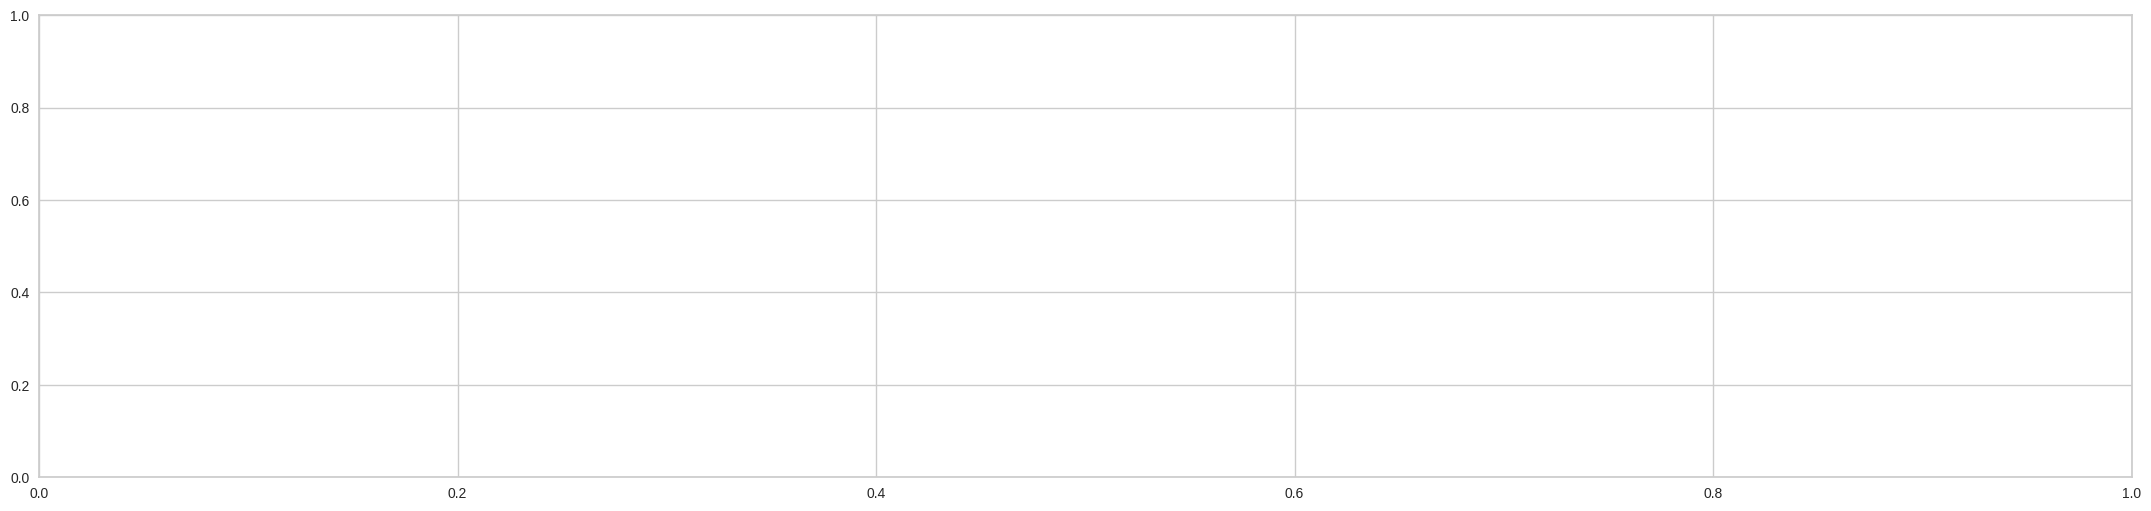

In [82]:
evaluate_model(tuned_knn)

**Create Logistic Regression Model**

In [85]:
lr = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.8395,0.5385,0.4403,0.4733,0.3858,0.4025
1,0.5769,0.8495,0.5769,0.4509,0.4994,0.4291,0.4493
2,0.6538,0.8855,0.6538,0.4918,0.5479,0.5282,0.5659
3,0.6538,0.8628,0.6538,0.5609,0.5923,0.5339,0.5510
4,0.6154,0.8642,0.6154,0.5740,0.5703,0.4872,0.5090
5,0.5385,0.8760,0.5385,0.5089,0.4885,0.3735,0.3937
6,0.6154,0.8283,0.6154,0.5016,0.5483,0.4862,0.5011
7,0.6538,0.9220,0.6538,0.4997,0.5572,0.5320,0.5665
8,0.6538,0.8840,0.6538,0.5545,0.5885,0.5385,0.5590


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [87]:
tuned_lr = tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6538,0.8319,0.6538,0.7333,0.6725,0.5683,0.5791
1,0.5769,0.8404,0.5769,0.5291,0.5438,0.4634,0.4723
2,0.6154,0.8807,0.6154,0.6676,0.6333,0.5140,0.5160
3,0.6538,0.8686,0.6538,0.7343,0.6626,0.5526,0.5625
4,0.5769,0.8551,0.5769,0.5855,0.5585,0.4733,0.4840
5,0.5385,0.8986,0.5385,0.6098,0.5334,0.4168,0.4297
6,0.4615,0.8526,0.4615,0.4474,0.4406,0.3234,0.3296
7,0.7692,0.9270,0.7692,0.7708,0.7527,0.7045,0.7100
8,0.6154,0.8891,0.6154,0.6660,0.6176,0.5221,0.5299


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [88]:
tuned_lr


LogisticRegression(C=6.373, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

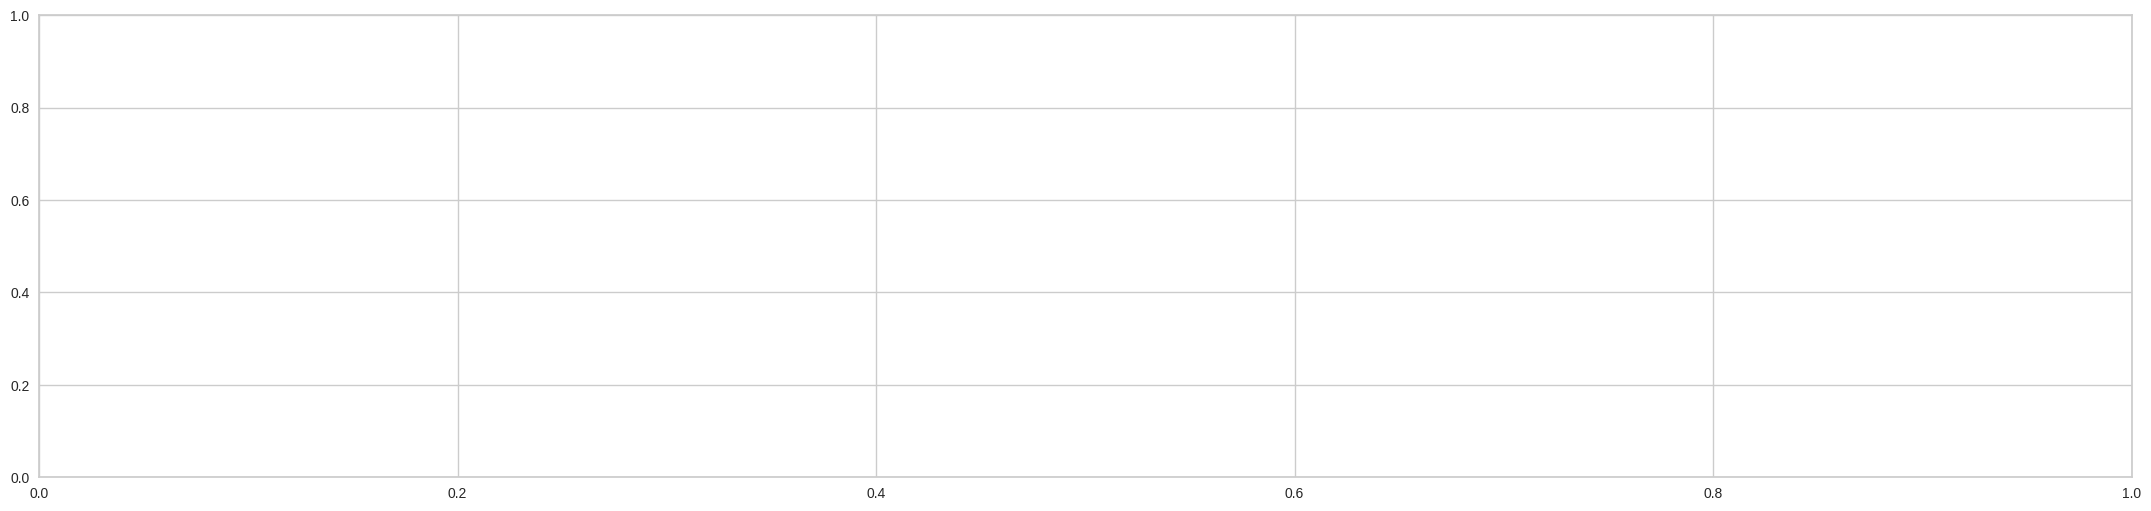

In [89]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [90]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3846,0.8029,0.3846,0.4692,0.4203,0.2268,0.2320
1,0.5769,0.8266,0.5769,0.5596,0.5672,0.4573,0.4600
2,0.7308,0.9380,0.7308,0.6671,0.6860,0.6445,0.6541
3,0.6154,0.8751,0.6154,0.5737,0.5744,0.4862,0.5002
4,0.6923,0.9367,0.6923,0.6838,0.6835,0.6061,0.6084
5,0.6538,0.9222,0.6538,0.6795,0.6596,0.5610,0.5642
6,0.5769,0.8680,0.5769,0.7019,0.5587,0.4791,0.5010
7,0.7692,0.9047,0.7692,0.6575,0.6977,0.6971,0.7163
8,0.7308,0.9437,0.7308,0.7654,0.7253,0.6611,0.6711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [91]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5769,0.7854,0.5769,0.5044,0.5286,0.4521,0.4714
1,0.5385,0.8026,0.5385,0.4315,0.4734,0.4000,0.4159
2,0.6923,0.8179,0.6923,0.5105,0.5839,0.5848,0.6193
3,0.5769,0.7892,0.5769,0.4417,0.4872,0.4234,0.4536
4,0.5769,0.8308,0.5769,0.4615,0.5034,0.4479,0.4647
5,0.5385,0.8075,0.5385,0.4034,0.4589,0.3918,0.4103
6,0.6538,0.8071,0.6538,0.5603,0.5861,0.5491,0.5743
7,0.6923,0.8743,0.6923,0.5598,0.6020,0.5889,0.6213
8,0.7308,0.8732,0.7308,0.6425,0.6673,0.6480,0.6712


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

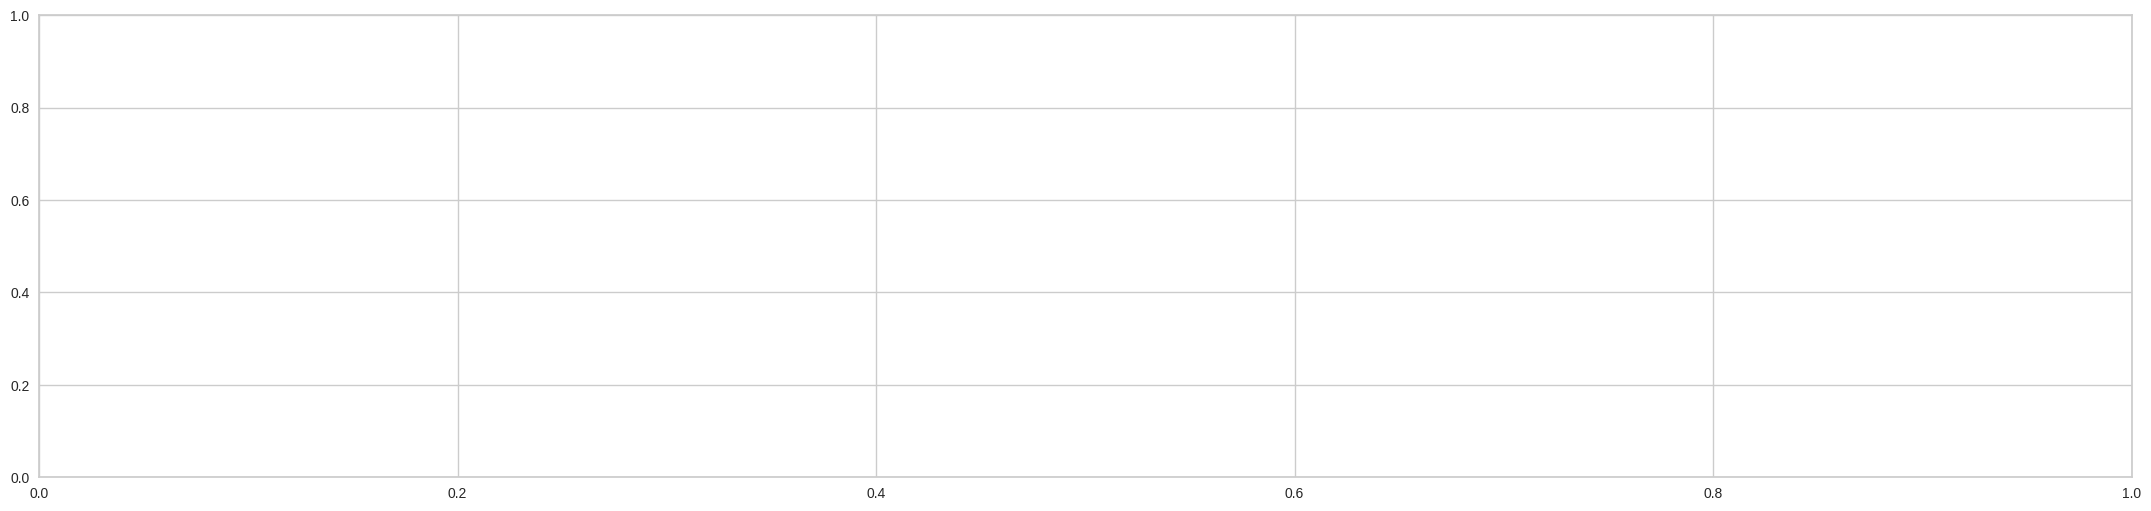

In [92]:
evaluate_model(tuned_rf)


**Tune the Best Model**

In [93]:

# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6538,0.8319,0.6538,0.7333,0.6725,0.5683,0.5791
1,0.5769,0.8404,0.5769,0.5291,0.5438,0.4634,0.4723
2,0.6154,0.8807,0.6154,0.6676,0.6333,0.5140,0.5160
3,0.6538,0.8686,0.6538,0.7343,0.6626,0.5526,0.5625
4,0.5769,0.8551,0.5769,0.5855,0.5585,0.4733,0.4840
5,0.5385,0.8986,0.5385,0.6098,0.5334,0.4168,0.4297
6,0.4615,0.8526,0.4615,0.4474,0.4406,0.3234,0.3296
7,0.7692,0.9270,0.7692,0.7708,0.7527,0.7045,0.7100
8,0.6154,0.8891,0.6154,0.6660,0.6176,0.5221,0.5299


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [94]:
tuned_best_model


LogisticRegression(C=6.373, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1368, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

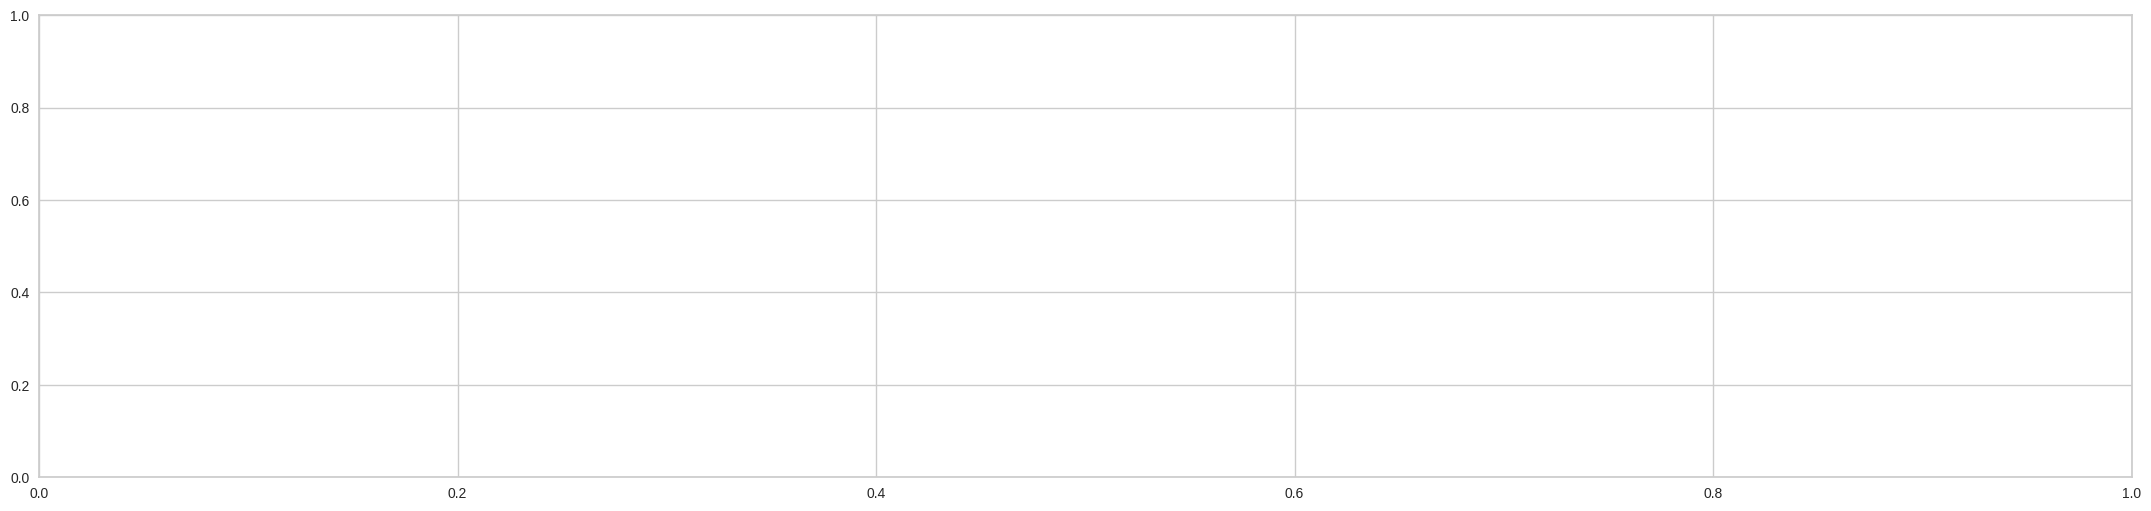

In [95]:
evaluate_model(tuned_best_model)


**Classification + PCA**

In [97]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=1368, normalize = True, pca = True, pca_components = 2)


,Description,Value
0,Session id,1368
1,Target,type
2,Target type,Multiclass
3,Target mapping,"P: 0, R: 1, SO: 2, SW: 3, T: 4, W: 5"
4,Original data shape,"(372, 7)"
5,Transformed data shape,"(372, 3)"
6,Transformed train set shape,"(260, 3)"
7,Transformed test set shape,"(112, 3)"
8,Numeric features,6
9,Preprocess,True


In [98]:

#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6654,0.8851,0.6654,0.6378,0.6393,0.5691,0.5774,0.4570
knn,K Neighbors Classifier,0.6269,0.8637,0.6269,0.6027,0.5966,0.5206,0.5308,0.1350
rf,Random Forest Classifier,0.6269,0.8939,0.6269,0.6303,0.6111,0.5231,0.5322,0.2810
dt,Decision Tree Classifier,0.6231,0.7669,0.6231,0.6152,0.6069,0.5158,0.5234,0.2640
xgboost,Extreme Gradient Boosting,0.6154,0.8808,0.6154,0.6255,0.6072,0.5090,0.5162,0.3220
lightgbm,Light Gradient Boosting Machine,0.6077,0.8733,0.6077,0.6164,0.5950,0.4964,0.5049,0.5820
gbc,Gradient Boosting Classifier,0.6038,0.8667,0.6038,0.6120,0.5949,0.4949,0.5007,2.1060
lr,Logistic Regression,0.6000,0.8681,0.6000,0.4938,0.5280,0.4621,0.4837,0.1920
qda,Quadratic Discriminant Analysis,0.5846,0.8808,0.5846,0.6077,0.5719,0.4723,0.4836,0.1330
lda,Linear Discriminant Analysis,0.5615,0.8357,0.5615,0.4585,0.4750,0.4049,0.4475,0.1280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [99]:
best_model_pca


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1368, verbose=0, warm_start=False)

In [100]:

#Create the model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5385,0.8321,0.5385,0.5641,0.5436,0.4068,0.4147
1,0.6154,0.7741,0.6154,0.5692,0.5791,0.5000,0.5071
2,0.6923,0.8428,0.6923,0.6677,0.6742,0.6000,0.6024
3,0.6154,0.8706,0.6154,0.5327,0.5701,0.4971,0.5042
4,0.6538,0.8708,0.6538,0.6051,0.6235,0.5534,0.5589
5,0.5000,0.8620,0.5000,0.4445,0.4618,0.3574,0.3741
6,0.5385,0.8255,0.5385,0.4865,0.4986,0.4190,0.4327
7,0.7308,0.9280,0.7308,0.6190,0.6593,0.6452,0.6590
8,0.6923,0.9335,0.6923,0.8125,0.6896,0.6197,0.6384


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [101]:

# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.8667,0.6154,0.6557,0.6218,0.5094,0.5202
1,0.6154,0.8175,0.6154,0.5359,0.5639,0.5066,0.5197
2,0.6923,0.9071,0.6923,0.6859,0.6868,0.6068,0.6080
3,0.6538,0.8611,0.6538,0.6577,0.6444,0.5517,0.5572
4,0.5769,0.8820,0.5769,0.5462,0.5491,0.4583,0.4654
5,0.5000,0.8993,0.5000,0.6571,0.5188,0.3729,0.3836
6,0.5769,0.8831,0.5769,0.5346,0.5408,0.4694,0.4847
7,0.7308,0.8995,0.7308,0.6190,0.6593,0.6466,0.6644
8,0.6538,0.9227,0.6538,0.6923,0.6492,0.5667,0.5763


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
tuned_best_model_pca


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1368, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

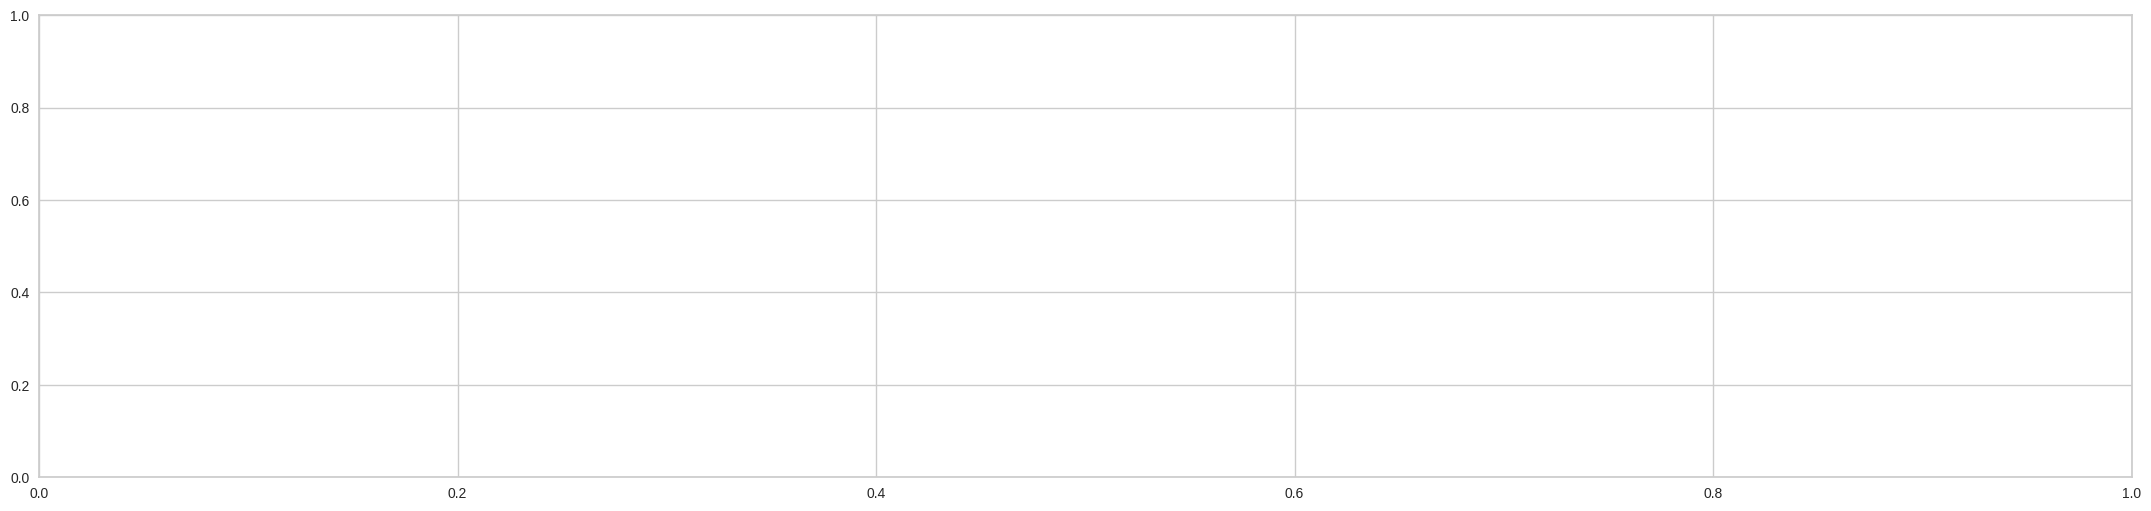

In [103]:

#Evaluate the model 
evaluate_model(tuned_best_model_pca)

In [104]:

#Create the model
Et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7993,0.5000,0.5846,0.5230,0.3670,0.3755
1,0.6538,0.8303,0.6538,0.5662,0.5995,0.5560,0.5669
2,0.7692,0.9047,0.7692,0.7334,0.7464,0.7000,0.7028
3,0.6538,0.8655,0.6538,0.5994,0.6051,0.5375,0.5531
4,0.7692,0.9368,0.7692,0.7628,0.7637,0.7051,0.7064
5,0.6154,0.8832,0.6154,0.6004,0.5987,0.5029,0.5078
6,0.5000,0.8694,0.5000,0.5001,0.4747,0.3717,0.3831
7,0.7692,0.9290,0.7692,0.6575,0.6977,0.6971,0.7163
8,0.7692,0.9487,0.7692,0.7756,0.7612,0.7034,0.7062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [105]:
# Tune hyperparameters with scikit-learn (default)
tuned_Et = tune_model(Et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.8667,0.6154,0.6557,0.6218,0.5094,0.5202
1,0.6154,0.8175,0.6154,0.5359,0.5639,0.5066,0.5197
2,0.6923,0.9071,0.6923,0.6859,0.6868,0.6068,0.6080
3,0.6538,0.8611,0.6538,0.6577,0.6444,0.5517,0.5572
4,0.5769,0.8820,0.5769,0.5462,0.5491,0.4583,0.4654
5,0.5000,0.8993,0.5000,0.6571,0.5188,0.3729,0.3836
6,0.5769,0.8831,0.5769,0.5346,0.5408,0.4694,0.4847
7,0.7308,0.8995,0.7308,0.6190,0.6593,0.6466,0.6644
8,0.6538,0.9227,0.6538,0.6923,0.6492,0.5667,0.5763


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [106]:

#Create the model
Dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4615,0.6730,0.4615,0.4652,0.4487,0.3158,0.3225
1,0.6154,0.7630,0.6154,0.6154,0.6026,0.5066,0.5136
2,0.6923,0.8104,0.6923,0.6500,0.6627,0.6023,0.6106
3,0.5385,0.6942,0.5385,0.4050,0.4622,0.3834,0.3954
4,0.7308,0.8352,0.7308,0.7748,0.7275,0.6546,0.6610
5,0.4615,0.6737,0.4615,0.5096,0.4800,0.3158,0.3176
6,0.5769,0.7352,0.5769,0.5801,0.5725,0.4604,0.4630
7,0.7692,0.8492,0.7692,0.6575,0.6977,0.6971,0.7163
8,0.7308,0.8440,0.7308,0.7564,0.7410,0.6604,0.6617


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [107]:
# Tune hyperparameters with scikit-learn (default)
tuned_Dt = tune_model(Dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5769,0.7983,0.5769,0.4709,0.5140,0.4392,0.4590
1,0.5385,0.8584,0.5385,0.4769,0.5032,0.3953,0.4020
2,0.6923,0.8513,0.6923,0.5983,0.6256,0.5889,0.6141
3,0.5769,0.8249,0.5769,0.5929,0.5708,0.4521,0.4566
4,0.6538,0.8273,0.6538,0.5442,0.5933,0.5456,0.5547
5,0.5385,0.8442,0.5385,0.5310,0.5251,0.3977,0.4033
6,0.5769,0.8621,0.5769,0.5878,0.5473,0.4694,0.4837
7,0.7308,0.8600,0.7308,0.5809,0.6331,0.6396,0.6704
8,0.8077,0.8789,0.8077,0.8478,0.8044,0.7584,0.7669


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

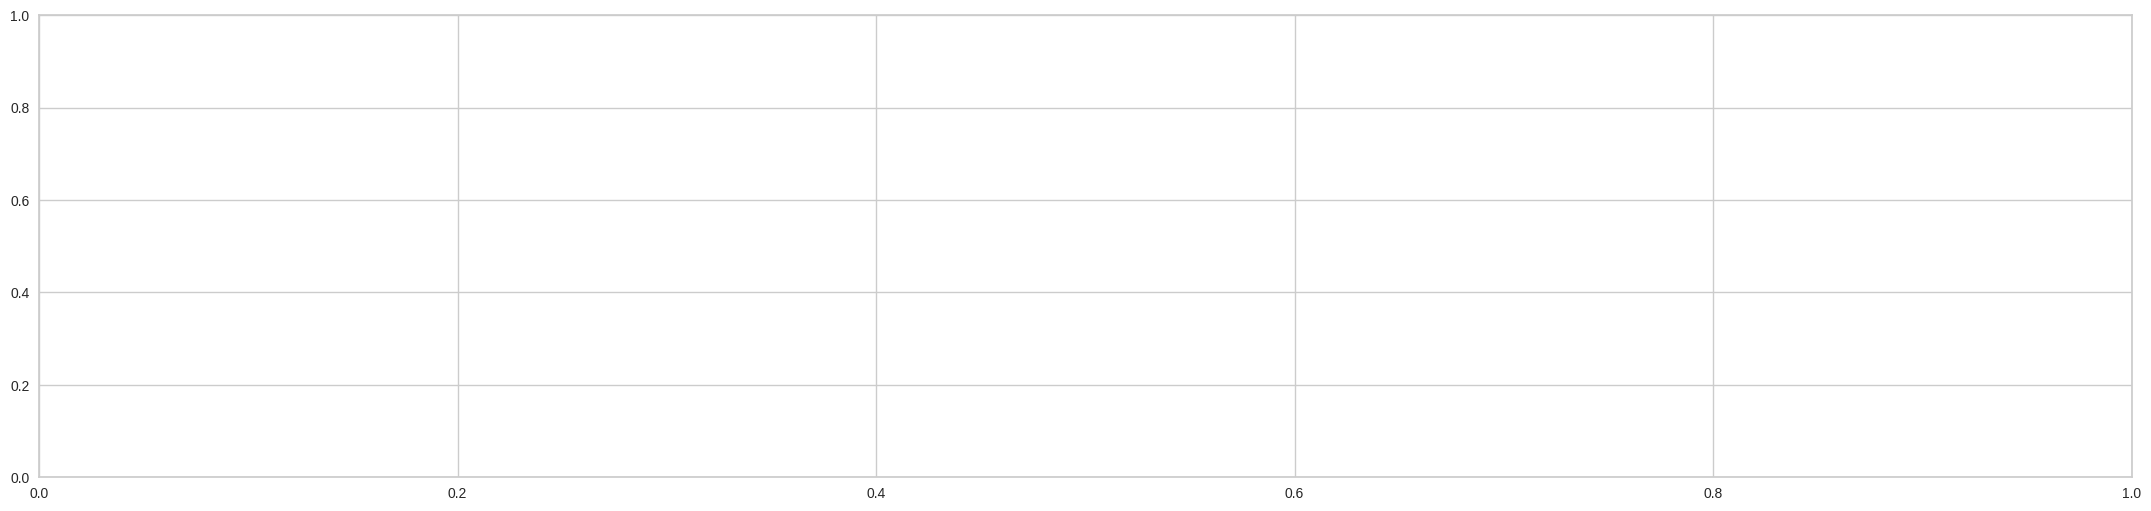

In [108]:
#Evaluate the model 
evaluate_model(tuned_Dt)

**Explainable AI with Shapley values**

In [109]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.3 MB/s eta 0:00:00


In [110]:
import shap


In [115]:
rf_pca = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3846,0.8029,0.3846,0.4692,0.4203,0.2268,0.2320
1,0.5769,0.8266,0.5769,0.5596,0.5672,0.4573,0.4600
2,0.7308,0.9380,0.7308,0.6671,0.6860,0.6445,0.6541
3,0.6154,0.8751,0.6154,0.5737,0.5744,0.4862,0.5002
4,0.6923,0.9367,0.6923,0.6838,0.6835,0.6061,0.6084
5,0.6538,0.9222,0.6538,0.6795,0.6596,0.5610,0.5642
6,0.5769,0.8680,0.5769,0.7019,0.5587,0.4791,0.5010
7,0.7692,0.9047,0.7692,0.6575,0.6977,0.6971,0.7163
8,0.7308,0.9437,0.7308,0.7654,0.7253,0.6611,0.6711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [116]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5769,0.7854,0.5769,0.5044,0.5286,0.4521,0.4714
1,0.5385,0.8026,0.5385,0.4315,0.4734,0.4000,0.4159
2,0.6923,0.8179,0.6923,0.5105,0.5839,0.5848,0.6193
3,0.5769,0.7892,0.5769,0.4417,0.4872,0.4234,0.4536
4,0.5769,0.8308,0.5769,0.4615,0.5034,0.4479,0.4647
5,0.5385,0.8075,0.5385,0.4034,0.4589,0.3918,0.4103
6,0.6538,0.8071,0.6538,0.5603,0.5861,0.5491,0.5743
7,0.6923,0.8743,0.6923,0.5598,0.6020,0.5889,0.6213
8,0.7308,0.8732,0.7308,0.6425,0.6673,0.6480,0.6712


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

In [119]:
interpret_model(tuned_rf_pca, plot='summary')

ModuleNotFoundError: ignored

**Visualize a single prediction**

In [114]:
interpret_model(tuned_et_pca, plot='reason', observation=35)


ModuleNotFoundError: ignored

**Visualize many predictions**

In [120]:
interpret_model(tuned_rf_pca, plot='reason')


ModuleNotFoundError: ignored